# Credit Card Fraud Prediction

We will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [96]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the data

In [97]:
data = pd.read_csv("fraud_data.csv")
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
5,-0.713266,0.869132,0.330114,0.902275,0.520836,-0.537036,0.301955,0.209117,-0.732441,-0.266402,...,0.114405,0.412489,0.223180,-0.430522,0.109774,-0.274569,-0.108067,-0.075318,4.95,0
6,1.219060,-0.207708,0.782809,0.271655,-0.456658,0.414201,-0.675133,0.057714,0.601970,-0.178378,...,0.170372,0.541010,-0.257175,-0.904534,0.414090,0.653565,0.014583,0.027320,47.65,0
7,0.683918,0.329216,-1.693025,-1.123644,2.662177,3.563731,-0.309291,-0.043369,0.050627,-0.361619,...,1.072188,0.671990,-0.208488,0.735029,0.633444,-0.281231,0.299686,0.293389,1.00,0
8,-1.127820,1.461342,0.526673,-0.158998,0.353158,-1.539196,0.727383,0.299275,-0.778768,-1.662588,...,-0.068002,-0.494914,-0.343489,0.222014,0.541271,0.295158,-0.145161,-0.002592,0.76,0
9,-1.757794,0.821894,2.529482,-0.328198,-0.902062,0.739803,-0.119755,-0.797691,0.739508,3.458517,...,0.028491,0.778325,-0.073034,0.135780,-0.955393,-0.503613,-1.834281,-0.585528,10.00,0


#### Percentage of Fraud Instnaces in the data set

In [98]:
data['Class'].sum().astype('float')/len(data)

0.016410823768035772

### Creating training and test data

In [99]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(16269, 29) (16269,) (5424, 29) (5424,)


### Dummy Classifier

In [100]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
dummy_clf

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

#### Returning the `(accuracy score, recall score)`

In [101]:
print("Accuracy Score = {0}, Recall Score = {1}".format(dummy_clf.score(X_test,y_test),recall_score(y_test,dummy_clf.predict(X_test))))

Accuracy Score = 0.9852507374631269, Recall Score = 0.0


### Default Support Vector Classifier SVC

In [102]:
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC

svc = SVC().fit(X_train,y_train)
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Returning the `(accuracy score, recall score, precision score)` for SVC

In [103]:
print("Accuracy Score ={0}, Recall Score = {1}, Precision Score = {2}".format(svc.score(X_test,y_test),recall_score(y_test,svc.predict(X_test)),precision_score(y_test,svc.predict(X_test))))

Accuracy Score =0.9907817109144543, Recall Score = 0.375, Precision Score = 1.0


### Confusion Matrix for SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}` when decision function thrshold is -220

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

svc = SVC(C=1e9, gamma = 1e-07).fit(X_train,y_train)
y_test_scores = svc.decision_function(X_test)

# Classifying based on threshold of -220
y_test_scores[y_test_scores < -220] = 0
y_test_scores[y_test_scores >= -220] = 1

#### Confusion Matrix

In [105]:
confusion_matrix(y_test,y_test_scores)

array([[   0, 5344],
       [   0,   80]], dtype=int64)

### Logistic Regressin Classifier

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib notebook
    
#model
logreg = LogisticRegression().fit(X_train,y_train)
    
#decision functions
y_scores = logreg.decision_function(X_test)
    
#probability estimates
y_prob_est = logreg.predict_proba(X_test)
    
#curves
precision, recall, threshold = precision_recall_curve(y_test,y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

#### ROC curve

<IPython.core.display.Javascript object>


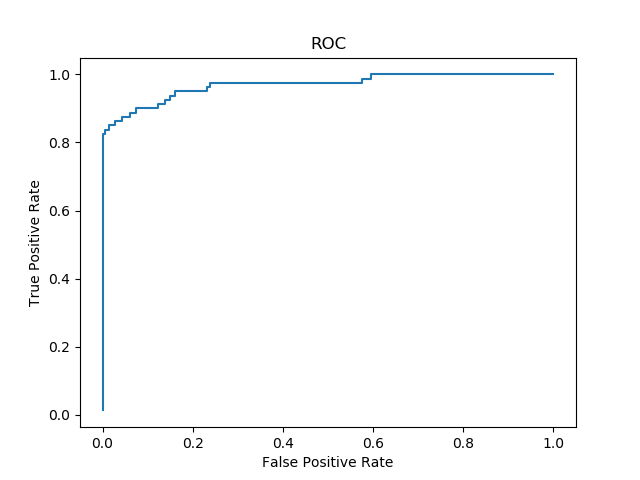

In [107]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

#### Precision-Recall Curve

<IPython.core.display.Javascript object>


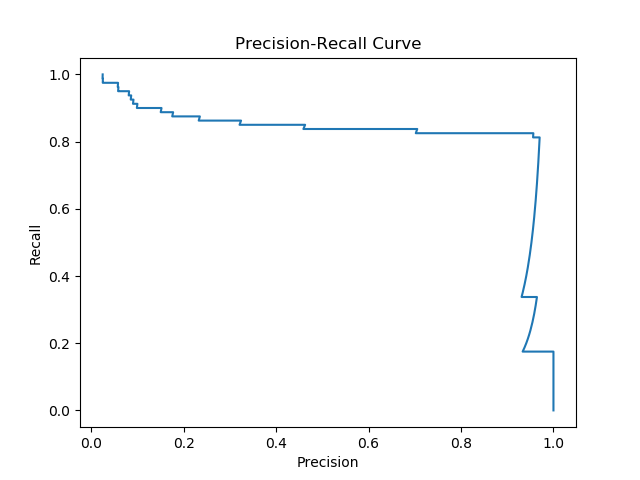

In [108]:
plt.figure()
plt.plot(precision, recall)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve');

#### What is the recall when precision is `0.75`?

In [109]:
if (sum(precision == 0.75) != 0):
    rec = recall[np.where(precision == 0.75)[0][0]]
else:
    rec = recall[np.asarray(np.abs(precision - 0.75)).argmin()]
rec

0.825

#### What is the precision when recall is `0.16`?

In [110]:
if (sum(fpr == 0.16) != 0):
    tp = recall[np.where(precision == 0.75)]
else: 
    tp = tpr[np.asarray(np.abs(fpr - 0.16)).argmin()]
        
recall[precision== 0.75][0]

0.825

### GridSearch over parameters `'penalty': ['l1', 'l2']` and `'C':[0.01, 0.1, 1, 10, 100]` 
Using `Recall` for scoring and `5-fold` cross-validation.

<br>

**Let's find out the mean test scores for each parameter combination**

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
    
LogReg = LogisticRegression()
    
grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
    
Grid_LogReg = GridSearchCV(LogReg,param_grid = grid_values,scoring = 'recall')
Grid_LogReg.fit(X_train,y_train) 


df = pd.DataFrame(Grid_LogReg.cv_results_['mean_test_score'].reshape((5,2)),columns=['L1','L2'],index=['0.01','0.1','1','10','100'])
df.index.rename(name='Gamma',inplace=True)
print("Mean test scores for each parameter combination: \n",df)

Mean test scores for each parameter combination: 
              L1        L2
Gamma                    
0.01   0.666667  0.760870
0.1    0.800725  0.804348
1      0.811594  0.811594
10     0.807971  0.811594
100    0.807971  0.811594


#### Visualizing GridSearch functioning

<IPython.core.display.Javascript object>


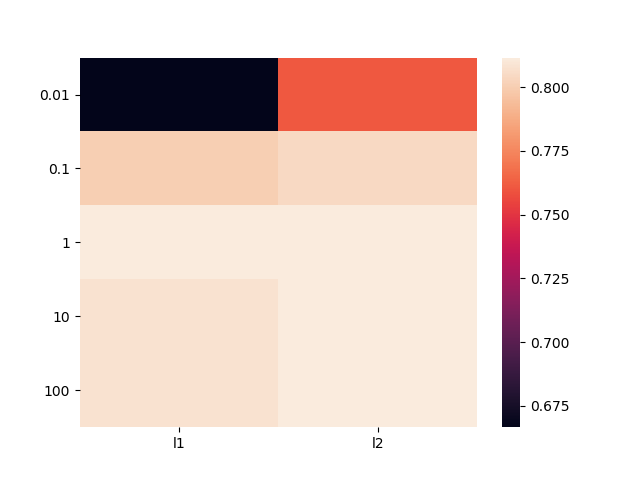

In [112]:
import seaborn as sns
plt.figure()
sns.heatmap(Grid_LogReg.cv_results_['mean_test_score'].reshape((5,2)), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
plt.yticks(rotation=0);